In [1]:
#Pyber Sharing Data 2016

#Pyper is a ride-sharing web application that serves in three main types of city areas (Urban, Rural, and Suburban). For this case study, we used a population of 2374 (rides) that will help the study determine the correlation between a number of rides vs fare revenue. 
#As we can see in the bubble plot chart, as the number of rides increases we can see that the value of the fares decreases. Which means there is a low correlation between them and the data points are all scattered. 
#Also, we can see a high concentration of drivers and riders in urban areas with have the lowest fares. On the other side, we can see that in rural areas the fares are higher than suburban and urban areas. Whit suburban being in the average between rides and fares. 
#The total fares by city type are broken in 62.7% Urban, 30.5% Suburban, and 6.8% rural. 
#The total rides by city type are broken in 68.4% Urban, 26.3% Suburban, and 5.3% Rural.
#The total drivers by city type are broken in 86.7% Urban, 12.5% Suburban, and 0.08% Rural. 
#In conclusion, we can determine that in urban cities the concentrations of drivers is the highest and in rural areas is the lowest and that is determined by offer and demand.


In [3]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv as csv

# File to Load (Remember to change these)

city_data = ("data/city_data.csv")
ride_data = ("data/ride_data.csv")

# Read the City and Ride Data

city_data = pd.read_csv("data/city_data.csv")
ride_data = pd.read_csv("data/ride_data.csv")

# Combine the data into a single dataset

combined_pyber_city_ride_data = pd.merge(city_data, ride_data, on="city", how="inner")
cpcr_df = combined_pyber_city_ride_data



In [4]:
city_data.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [7]:
# Display the data table for preview
cpcr_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

In [7]:
#This is how we search column_1 and then groupby by column_2 
# ds= df[["search_column_1"] operand "select_item_from_column_1"].method([df["select_second_column"]])

urban_ds = cpcr_df[cpcr_df["type"] == "Urban"].groupby([cpcr_df["city"]])
rural_ds = cpcr_df[cpcr_df["type"] == "Rural"].groupby([cpcr_df["city"]])
suburban_ds = cpcr_df[cpcr_df["type"] == "Suburban"].groupby([cpcr_df["city"]])

# Obtain the x and y coordinates for each of the three city types

#Urban

x_urban_ds = urban_ds["ride_id"].count()
y_urban_ds = urban_ds["fare"].mean()
s_urban_ds = urban_ds["driver_count"].mean()

#Rural

x_rural_ds = rural_ds["ride_id"].count()
y_rural_ds = rural_ds["fare"].mean()
s_rural_ds = rural_ds["driver_count"].mean()

#Suburban

x_suburban_ds = suburban_ds["ride_id"].count()
y_suburban_ds = suburban_ds["fare"].mean()
s_suburban_ds = suburban_ds["driver_count"].mean()


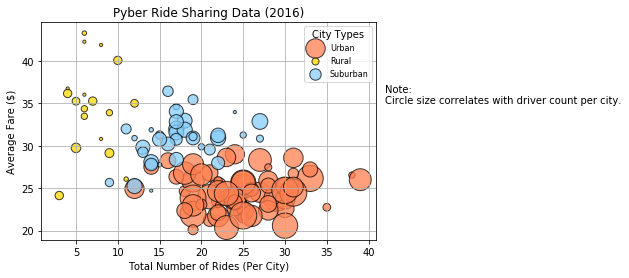

In [8]:
# Build the scatter plots for each city types
plt.scatter(x_urban_ds,y_urban_ds, label = "Urban", s=s_urban_ds * 10, color=["coral"], edgecolor="black", alpha = 0.75, marker="o")
plt.scatter(x_rural_ds,y_rural_ds, label = "Rural", s=s_rural_ds * 10, color=["gold"], edgecolor="black", alpha = 0.75, marker="o")
plt.scatter(x_suburban_ds,y_suburban_ds, label = "Suburban", s=s_suburban_ds  * 10, color=["lightskyblue"], edgecolor="black", alpha = 0.75, marker="o")
plt.grid()

# Incorporate the other graph properties
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")

# Create a legend
legend = plt.legend(fontsize = 8, title= "City Types", loc="best") 

# Incorporate a text label regarding circle size
plt.text(42,35,"Note: \nCircle size correlates with driver count per city.", fontsize = 10)

# Save Figure
#plt.savefig("Images/PyberRideSharingData.png", bbox_inches="tight")

# Show Figure
plt.show()

## Total Fares by City Type

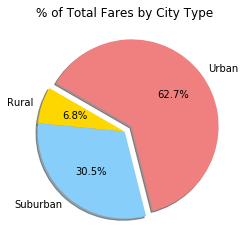

In [9]:
# Calculate Type Percents

group_by_city_type_ds = cpcr_df.groupby(["type"])
total_fares_by_city_type_ds = group_by_city_type_ds["fare"].sum()

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(total_fares_by_city_type_ds, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")

# Save Figure

# Show Figure
plt.show()

## Total Rides by City Type

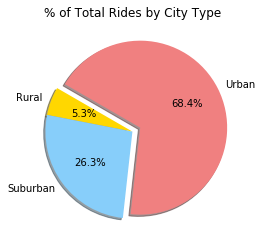

In [10]:
# Calculate Ride Percents

total_rides_by_city_type = group_by_city_type_ds["ride_id"].count()
#total_rides_by_city_type -- will return total group count

# Build Pie Chart

labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(total_rides_by_city_type, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")
# Save Figure

# Show Figure
plt.show()

## Total Drivers by City Type

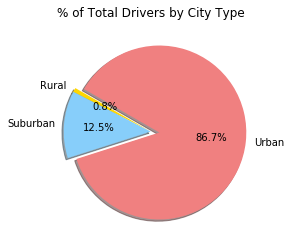

In [11]:
# Calculate Driver Percents
total_drivers_by_city_percents_ds = group_by_city_type_ds["driver_count"].sum()
total_drivers_by_city_percents_ds
# Build Pie Charts
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(total_drivers_by_city_percents_ds, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Drivers by City Type")

# Save Figure

# Show Figure
plt.show()